# MAC0219 - Programação Concorrente e Paralela

## EP2: Cálculo do Conjunto de Mandelbrot em Paralelo com OpenMPI  - OpenMPI*(1+Pthreads+OpenMP)

Gabriel Brandão de Almeida, NUSP. 10737182.

In [1]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

import scipy.stats as st

sns.set_theme()

In [3]:
files = {
    'seq': 'results/mandelbrot_seq.csv',
    'pth': 'results/mandelbrot_pth.csv',
    'omp': 'results/mandelbrot_omp.csv',
    'ompi': 'results/mandelbrot_ompi.csv',
    'ompi_pth': 'results/mandelbrot_ompi_pth.csv'
}

In [4]:
def read_stats(path):
    return pd.read_csv(path)

In [21]:
stats = dict()

for prog, path in files.items():
    stats[prog] = read_stats(path)

In [6]:
def plot_stats(df, x, y, title, xlabel, ylabel, hue = None, legend = None, legend_title = None):
    fig, ax1 = plt.subplots(figsize=(10,8))
    
    for col in y:
        sp1 = sns.lineplot(data=df, x=x, y=col, hue=hue, ax=ax1, palette='deep', style=hue, markers=True)
    ax1.set_title(title)
    ax1.set_xlabel(xlabel)
    ax1.set_ylabel(ylabel)
    
    ax_legend = ax1.get_legend()
    if legend and ax_legend:
        handles = legend.legendHandles
        legend.remove()
        ax1.legend(
            handles,
            legend,
            title=legend_title
        )

#     plt.savefig(f"{title}.png".replace('/',''), format='png', dpi=150)

## Experimentos

Para cada uma das versões, foram realizadas medições de tempo de 15 execuções do programa para calcular a região de Triple Spiral Valley e figura de tamanho 4096. 

Os gráficos a seguir apresentam a média das medições na representação em linha e seus intervalos de confiança na região preenchida (95%).

## Resultados - Sequencial

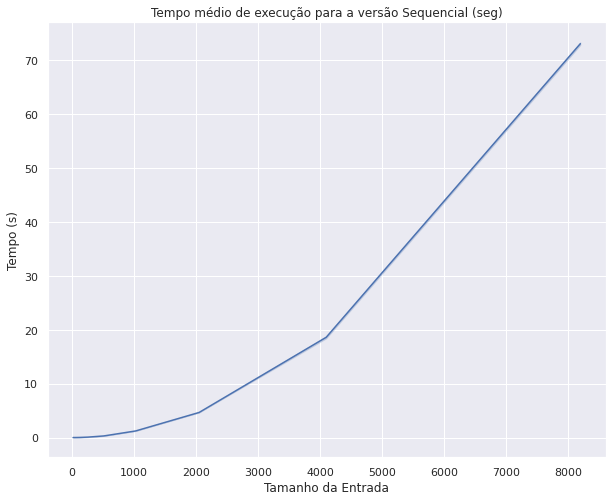

In [29]:
data = stats['seq']

plot_stats(data[data['region'] == 4], 'size', ['computation_time'], 'Tempo médio de execução para a versão Sequencial (seg)', 'Tamanho da Entrada', 'Tempo (s)')

O gráfico acima apresenta o tempo médio de execução com intervalo de confiança para diversos tamanhos de figuras. Para o propósito desse EP, observe que o tempo médio de execução para a figura de tamanho 4096, cujo tempo médio de execução está próximo de 19 segundos. O valor exato é apresentado a seguir.

In [31]:
data = data[(data['region'] == 4) & (data['size'] == 4096)]

m = data['total_time'].mean()
s = data['total_time'].std()

ic = 0.95 * s / len(data['total_time'])

print(f'Média de tempo (com intervalo de confiança): {m} ± {ic}')

Média de tempo (com intervalo de confiança): 19.37756 ± 0.033801737872153494


Para a versão sequencial do programa não há parâmetros a serem escolhidos. Os dados de medição de tempo serão usados para comparação com as demais versões.

## Resultados - PThreads

Para realizar as medições de tempo de execução, o programa com pthreads foi testado com números de threads variando em 1, 2, 4, 8, 16 e 32.

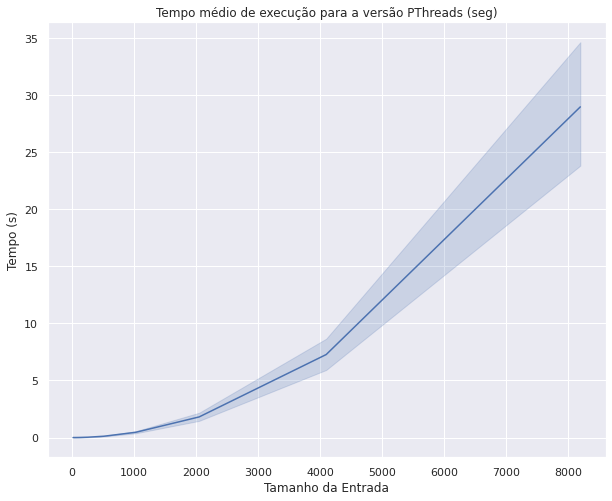

In [44]:
data = stats['pth']

plot_stats(data[data['region'] == 4], 'size', ['computation_time'], 'Tempo médio de execução para a versão PThreads (seg)', 'Tamanho da Entrada', 'Tempo (s)')

O gráfico acima apresenta o tempo médio de execução com intervalo de confiança para diversos tamanhos de figuras. Note que as medições apresentam maior variabilidade, pois para cada tamanho de figura são utilizados diferentes números de threads. 

Para o propósito desse EP, estamos interessados na figura de tamanho 4096, cujo tempo médio de execução está próximo de 8 segundos. O valor exato é apresentado a seguir.

In [45]:
data = data[(data['region'] == 4) & (data['size'] == 4096)]

m = data['total_time'].mean()
s = data['total_time'].std()

ic = 0.95 * s / len(data['total_time'])

print(f'Média de tempo (com intervalo de confiança): {m} ± {ic}')

Média de tempo (com intervalo de confiança): 8.012134999999999 ± 0.08860119472363488


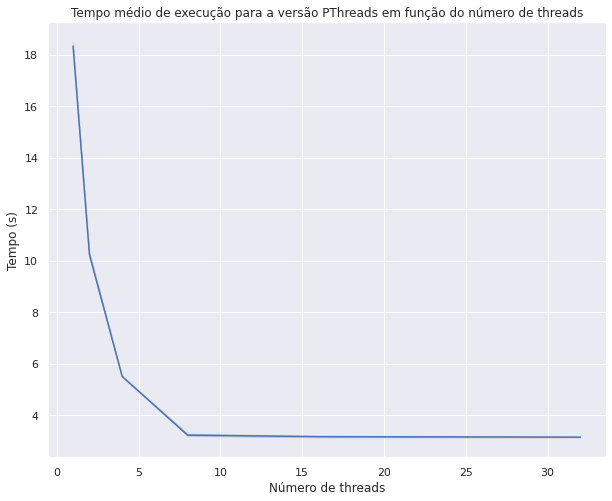

In [14]:
data = stats['pth']

plot_stats(data[(data['region'] == 4) & (data['size'] == 4096)], 'threads', ['computation_time'], 'Tempo médio de execução para a versão PThreads em função do número de threads', 'Número de threads', 'Tempo (s)')

In [46]:
data = data[(data['threads'] == 32)]

m = data['total_time'].mean()
s = data['total_time'].std()

ic = 0.95 * s / len(data['total_time'])

print(f'Média de tempo (com intervalo de confiança): {m} ± {ic}')

Média de tempo (com intervalo de confiança): 3.89077 ± 0.0022280647313806206


Note que o menor tempo médio de execução é obtido quando são utilizadas 32 threads. Portanto, esta é a quantidade ótima para a figura de tamanho 4096 na versão do programa implementada com PThreads.

## Resultados - OpenMP

Para realizar as medições de tempo de execução, o programa com OpenMP foi testado com números de threads variando em 1, 2, 4, 8, 16 e 32.

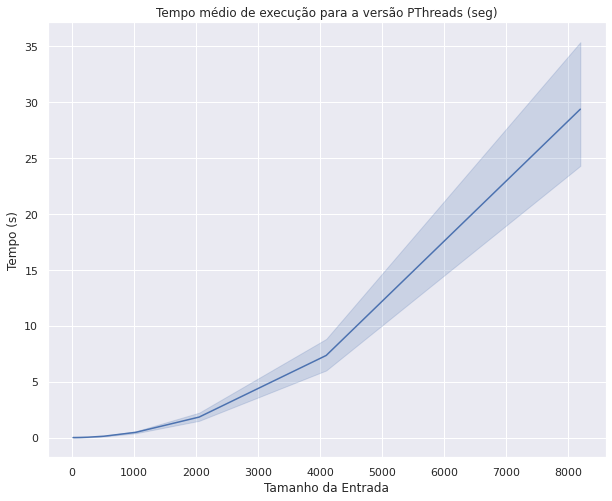

In [41]:
data = stats['omp']

plot_stats(data[data['region'] == 4], 'size', ['computation_time'], 'Tempo médio de execução para a versão PThreads (seg)', 'Tamanho da Entrada', 'Tempo (s)')

O gráfico acima apresenta o tempo médio de execução com intervalo de confiança para diversos tamanhos de figuras. De forma similar a versão do programa com PThreds, as medições apresentam maior variabilidade, pois para cada tamanho de figura são utilizados diferentes números de threads. 

Para o propósito desse EP, estamos interessados na figura de tamanho 4096, que apresneta tempo médio de execução próximo de 8 segundos. O valor exato é apresentado a seguir.

In [42]:
data = data[(data['region'] == 4) & (data['size'] == 4096)]

m = data['total_time'].mean()
s = data['total_time'].std()

ic = 0.95 * s / len(data['total_time'])

print(f'Média de tempo (com intervalo de confiança): {m} ± {ic}')

Média de tempo (com intervalo de confiança): 8.05404 ± 0.08928037321407299


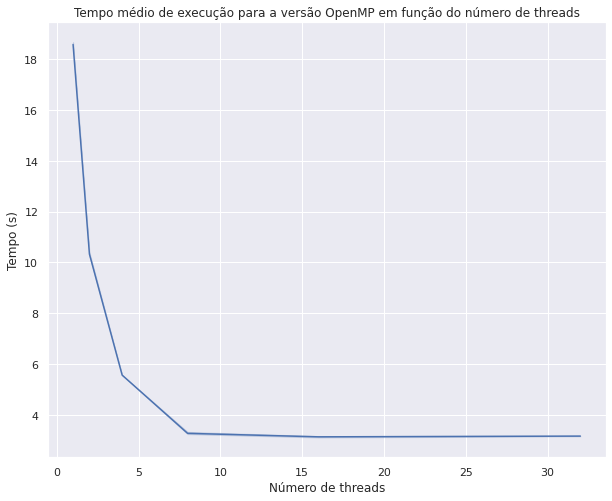

In [39]:
data = stats['omp']

plot_stats(data[(data['region'] == 4) & (data['size'] == 4096)], 'threads', ['computation_time'], 'Tempo médio de execução para a versão OpenMP em função do número de threads', 'Número de threads', 'Tempo (s)')

In [43]:
data = data[(data['threads'] == 32)]

m = data['total_time'].mean()
s = data['total_time'].std()

ic = 0.95 * s / len(data['total_time'])

print(f'Média de tempo (com intervalo de confiança): {m} ± {ic}')

Média de tempo (com intervalo de confiança): 3.8770700000000007 ± 0.0020248254526968176


Note que o menor tempo médio de execução é obtido quando são utilizadas 32 threads. Portanto, esta é a quantidade ótima para a figura de tamanho 4096 na versão implementada com OpenMP.

## Resultados - Open MPI

Para realizar as medições de tempo de execução, o programa com OpenMP foi testado com números de processos variando em 1, 2, 4, 8, 16, 32 e 64.

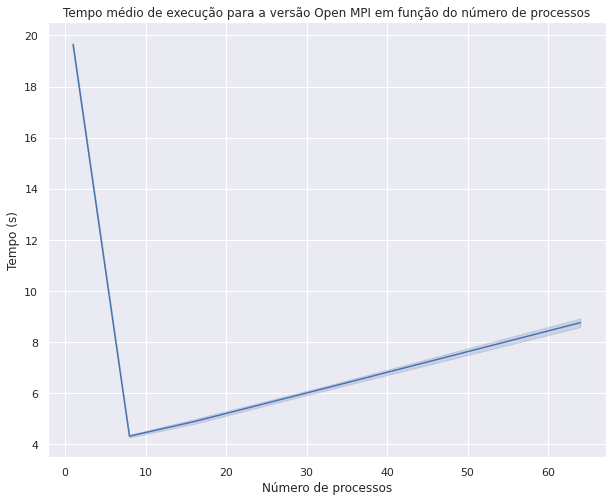

In [23]:
plot_stats(stats['ompi'], 'procs', ['computation_time'], 'Tempo médio de execução para a versão Open MPI em função do número de processos', 'Número de processos', 'Tempo (s)')

In [49]:
data = stats['ompi']

data = data[(data['procs'] == 8)]

m = data['computation_time'].mean()
s = data['computation_time'].std()

ic = 0.95 * s / len(data['computation_time'])

print(f'Média de tempo (com intervalo de confiança): {m} ± {ic}')

Média de tempo (com intervalo de confiança): 4.311093333333333 ± 0.006944506071624959


O gráfico acima apresenta o tempo médio de execução e respectivo intervalo de confiaça em função do número de processos utilizados no programa implementado com Open MPI.

Note que o menor tempo médio de execução é obtido com 8 processos. Portanto, esta é a quantidade ótima para esta versão do programa.

## Resultados - Open MPI com PThreads

Para realizar as medições de tempo de execução, o programa com OpenMP foi testado com números de processos variando em 2, 4, 8, 16, 32 e 64. E, para cada número de processos, a quantidad de threads utilizadas variavam em 1, 2, 4, 8, 16 e 32, de forma que toda combinação de quantidade de processos e threads não exceda 64 unidades de _workers_.

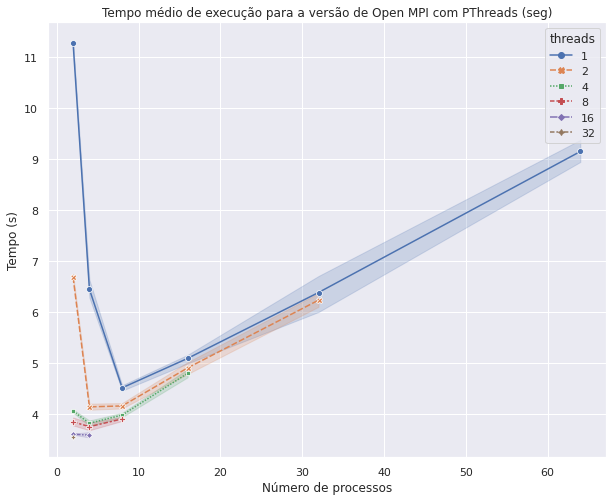

In [22]:
plot_stats(stats['ompi_pth'], 'procs', ['computation_time'], 'Tempo médio de execução para a versão de Open MPI com PThreads (seg)', 'Número de processos', 'Tempo (s)', 'threads')

In [50]:
data = stats['ompi_pth']

data = data[(data['procs'] == 2) & (data['threads'] == 32)]

m = data['computation_time'].mean()
s = data['computation_time'].std()

ic = 0.95 * s / len(data['computation_time'])

print(f'Média de tempo (com intervalo de confiança): {m} ± {ic}')

Média de tempo (com intervalo de confiança): 3.5612799999999996 ± 0.0011174909835934698


O gráfico acima apresenta o tempo médio de execução e respectivo intervalo de confiança para cada combinação de número de processos e quantidade de threads testados.

Note que o menor tempo de execução é obtido com a combinação de 2 processos e 32 threads em cada processo. Logo, estes são os melhores parâmentros para essa versão do programa.

## Conclusão

Reunidos na tabela abaixo estão os parâmetros ótimos e os tempos médios obtidos com os respectivos parâmetros ótimos.

| Versão do Programa | Número de Processos | Número de Threads | Tempo Médio (seg) |
|--------------------|---------------------|-------------------|-------------------|
| Sequencial         | *                   | *                 | 19.37             |
| PThreads           | *                   | 32                | 3.89              |
| OpenMP             | *                   | 32                | 3.88              |
| OpenMPI            | 8                   | *                 | 4.31              |
| OpenMPI + PThreads | 2                   | 32                | 3.56              |

Observando os tempos médios, pode-se concluir que o desempenho da versão do programa implementado com OpenMPI e PThreads têm uma pequena vantagem em relação as demais.